<a href="https://colab.research.google.com/github/MilaMiloserdova/MilaMiloserdova/blob/main/Bordeauxwines_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path_to_file = 'winenarrative.txt'
with open(path_to_file, 'r') as open_file:
    file_as_string = open_file.read().lower() 

In [ ]:
file_as_string[:200]

'\ufeffthe bordeaux 1855 classification\nthe complete guide to the historic, 1855 bordeaux classification of the wines of bordeaux from the medoc.\nthe historic 1855 bordeaux classification stands as the sing'

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import download
download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
file_as_words_list_with_nltk = word_tokenize(file_as_string)
file_as_words_list_with_nltk[:50]

['\ufeffthe',
 'bordeaux',
 '1855',
 'classification',
 'the',
 'complete',
 'guide',
 'to',
 'the',
 'historic',
 ',',
 '1855',
 'bordeaux',
 'classification',
 'of',
 'the',
 'wines',
 'of',
 'bordeaux',
 'from',
 'the',
 'medoc',
 '.',
 'the',
 'historic',
 '1855',
 'bordeaux',
 'classification',
 'stands',
 'as',
 'the',
 'single',
 'most',
 'important',
 'and',
 'famous',
 'classification',
 'of',
 'any',
 'wine',
 'region',
 'in',
 'the',
 'world',
 '.',
 'almost',
 '160',
 'years',
 'later',
 ',']

In [ ]:
file_as_words_list_with_nltk_no_punct = [word for word in file_as_words_list_with_nltk if word[0].isalpha()]

In [ ]:
file_as_words_list_with_nltk_no_punct[:25]

['bordeaux',
 'classification',
 'the',
 'complete',
 'guide',
 'to',
 'the',
 'historic',
 'bordeaux',
 'classification',
 'of',
 'the',
 'wines',
 'of',
 'bordeaux',
 'from',
 'the',
 'medoc',
 'the',
 'historic',
 'bordeaux',
 'classification',
 'stands',
 'as',
 'the']

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
filtered_words = [word for word in file_as_words_list_with_nltk_no_punct if word in stopwords.words('english')]
stop_words = [line.strip() for line in filtered_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words[:10]

['the', 'to', 'the', 'of', 'the', 'of', 'from', 'the', 'the', 'as']

In [ ]:
key_words = [word for word in file_as_words_list_with_nltk_no_punct if word not in stopwords.words('english')]

In [ ]:
key_words[:10]

['bordeaux',
 'classification',
 'complete',
 'guide',
 'historic',
 'bordeaux',
 'classification',
 'wines',
 'bordeaux',
 'medoc']

In [ ]:
from collections import Counter

In [ ]:
Counter(key_words).most_common(10)

[('wine', 1758),
 ('bordeaux', 1504),
 ('wines', 1060),
 ('chateau', 399),
 ('classification', 333),
 ('white', 288),
 ('best', 247),
 ('also', 244),
 ('cru', 225),
 ('emilion', 202)]

In [ ]:
!pip install pymorphy2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 8.2 MB 9.2 MB/s 


In [ ]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [ ]:
lemmatized_file = [morph.parse(word)[0].normal_form for word in file_as_words_list_with_nltk_no_punct_no_stop]

In [ ]:
lemmatized_file[:20]

['bordeaux',
 'classification',
 'complete',
 'guide',
 'historic',
 'bordeaux',
 'classification',
 'wines',
 'bordeaux',
 'medoc',
 'historic',
 'bordeaux',
 'classification',
 'stands',
 'single',
 'important',
 'famous',
 'classification',
 'wine',
 'region']

In [ ]:
Counter(lemmatized_file).most_common(10)

[('wine', 1758),
 ('bordeaux', 1504),
 ('wines', 1060),
 ('chateau', 399),
 ('classification', 333),
 ('white', 288),
 ('best', 247),
 ('also', 244),
 ('cru', 225),
 ('emilion', 202)]

In [ ]:
lemma_freqs = Counter(lemmatized_file).most_common(20)

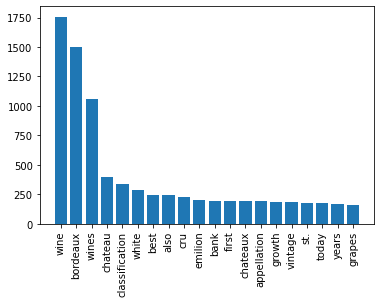

In [ ]:
import matplotlib.pyplot as plt 

values = [pair[1] for pair in lemma_freqs]
labels = [pair[0] for pair in lemma_freqs] 
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.show()
plt.close('all')

In [ ]:
len(lemmatized_file)

41527

In [ ]:
lemmatized_file = [word for word in lemmatized_file if len(word) >= 4]
len(lemmatized_file)

38839

In [ ]:
from nltk import Text as nltk_text
lemmatized_nltk_format = nltk_text(lemmatized_file)
type(lemmatized_nltk_format)

nltk.text.Text

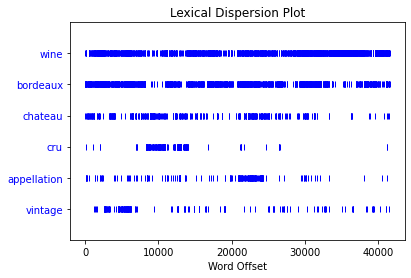

In [ ]:
lemmatized_nltk_format.dispersion_plot(["wine", "bordeaux", "chateau", "cru", "appellation", 'vintage'])

In [ ]:
len(lemmatized_file)

38839

In [ ]:
word_to_search = 'bordeaux'
counter = 0
search_counter = 0
freqs_list = []
for word in lemmatized_file:
    counter += 1
    if counter %50 == 0:
        freqs_list.append(search_counter/counter)
        counter = 0
        search_counter = 0
    if word == word_to_search:
        search_counter += 1

freqs_list.append(search_counter/counter)

In [ ]:
freqs_list

[0.1,
 0.02,
 0.16,
 0.02,
 0.04,
 0.02,
 0.02,
 0.04,
 0.1,
 0.04,
 0.02,
 0.06,
 0.06,
 0.08,
 0.12,
 0.04,
 0.04,
 0.04,
 0.0,
 0.04,
 0.02,
 0.02,
 0.02,
 0.02,
 0.06,
 0.08,
 0.16,
 0.14,
 0.1,
 0.06,
 0.1,
 0.12,
 0.1,
 0.12,
 0.04,
 0.02,
 0.04,
 0.06,
 0.04,
 0.08,
 0.16,
 0.08,
 0.1,
 0.08,
 0.1,
 0.1,
 0.08,
 0.06,
 0.12,
 0.14,
 0.14,
 0.06,
 0.1,
 0.08,
 0.0,
 0.04,
 0.04,
 0.04,
 0.02,
 0.08,
 0.08,
 0.08,
 0.12,
 0.02,
 0.0,
 0.02,
 0.04,
 0.0,
 0.0,
 0.1,
 0.06,
 0.04,
 0.02,
 0.02,
 0.04,
 0.02,
 0.0,
 0.08,
 0.1,
 0.1,
 0.06,
 0.1,
 0.06,
 0.02,
 0.08,
 0.08,
 0.1,
 0.08,
 0.0,
 0.0,
 0.02,
 0.02,
 0.12,
 0.1,
 0.04,
 0.02,
 0.02,
 0.02,
 0.06,
 0.02,
 0.0,
 0.1,
 0.02,
 0.06,
 0.08,
 0.1,
 0.06,
 0.08,
 0.06,
 0.04,
 0.1,
 0.04,
 0.1,
 0.06,
 0.16,
 0.1,
 0.12,
 0.08,
 0.1,
 0.06,
 0.04,
 0.1,
 0.08,
 0.0,
 0.04,
 0.06,
 0.06,
 0.04,
 0.02,
 0.0,
 0.02,
 0.04,
 0.02,
 0.02,
 0.06,
 0.0,
 0.14,
 0.08,
 0.04,
 0.0,
 0.02,
 0.06,
 0.04,
 0.02,
 0.1,
 0.04,
 0.1,
 0.0,
 0

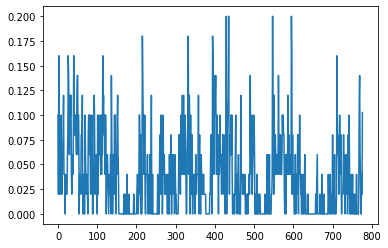

In [ ]:
plt.plot(freqs_list)